Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [0]:
NAME = "Hai Dang Hoang"
COLLABORATORS = ""

---

# CS110 Pre-class Work 4.2

## Part A. The Hire-Assistant Problem.

Imagine that you need to hire a new assistant. Every day an agency sends a new assistant for you to interview. If the assistant is better than your current assistant, then you fire your current assistant and you hire the better assistant. You may assume that assistant quality is uniformly distributed between 0 and 1.

## Question 1.
Write a function, named hire_assistant, that takes applicants (a list of the numbers that represent the level of qualification of the applicants; the higher the number, the better qualified), and returns the number hires if the applicants are presented in the exact same order as the input list applicants. Note that your function should not randomize anything (or else it would be called a randomized algorithm).

In [5]:
def hire_assistant(applicants):
    best = -float('inf') #have "best" be negative infinity so that the first person is always hired (since negative values are possible)
    hired = 0 #keep track of how many have been hired
    for i in applicants:
        if i > best: #if current applicant is greater than the best one so far
            best = i #update the value of the best applicant
            hired += 1
    return hired
    """
    Return the number of assistant hired.
    Inputs:
    - applicants: a list of the numbers that represent the level of qualification of 
    the applicants; the higher the number, the better qualified
    
    Outputs:
    - hires: Number of assistants hired
    """
    # YOUR CODE HERE
    raise NotImplementedError()

In [6]:
assert(hire_assistant([1])==1)
assert(hire_assistant([-1, -2, -3, -4])==1)

## Question 2. 
Assuming the applicants are presented in a random order, write a function that receives the number of applicants as input and returns the average number of assistants hired.

**N.B.:** Don’t forget to run the simulation several times for each given number of applicants to better estimate the number of hires (please refer to task 3 of the Study Guide).

In [56]:
#I think the instruction is inconsistent - it says to return the average number of hires, which already implies iteration, but also ask me to run the simulation several times. I guess what it meant here is just the number of hires (like the hat_check in part B below). Therefore, I have defined here the function that returns the number of hires, not the average. The graph in the later questions WILL return the average number through many iterations.
import random
def experimental_hires(N):
    list = [random.randint(1,N) for i in range(N+1)] #generate the random list of applicant. N has to start from 1 - minimum 1 applicant
    #print(list)
    best = -float('inf') #reuse the function above
    hired = 0
    for i in list:
        if i > best:
            best = i
            hired += 1
    return hired #the code returns how many is hired given the random list
    # YOUR CODE HERE
    raise NotImplementedError()

In [59]:
experimental_hires(100)

5

## Question 3.

Use the function below, `analytical_hires(N)`, which returns the analytical expected number of hires, given the number of applicants, along with the function you created in question 2 to create a graph with two curves such that:
* The x-axis shows the total number of applicants (make sure label the x-axis)
* The y-axis shows the average number of hires (make sure label the y-axis)
* The graph contains two curves;
    * Curve 1: the theoretical performance estimates computed calls to the function `analytical_hires`.
    * Curve 2: the simulated or experimental estimates using the function you created in question 2.


In [46]:
def analytical_hires(N):
    """
    Return the analytical expected number of hires if there are N applicants
    Inputs:
    - N: Number of applicants
    Outputs:
    - hires: Average number of assistants hired
    """
    # from the textbook, we know that the analytical result is 
    # 1 + 1/2 + 1/3 + ... + 1/N
    hires = 0
    for n in range(N):
        hires += 1/(n+1)
    return hires

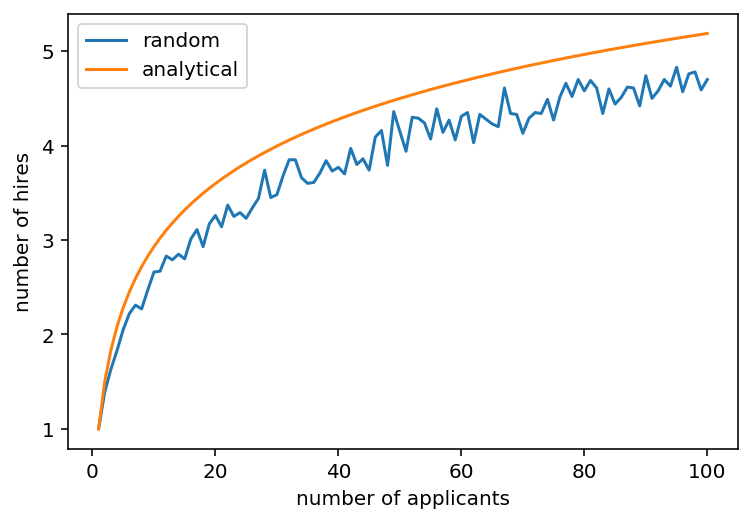

In [62]:
from numpy import mean
x=[] #the x axis
random_hired = [[] for i in range(100)] #a list of lists, since I want to take the average from each time experimental_hires run on each value of N
analytical_hired=[] #just a list, since the function will return a fixed number with each value of N anyway - no need for averages
for N in range(1,101):    
    x.append(N) #populate the x axis 
    random_hired_local=[] #a local list to store the results from experimental_hires, to be averaged later
    for j in range(100):  #reiterate 100 times
        random_hired_local.append(experimental_hires(N)) #store values
    random_hired[N-1].append(mean(random_hired_local)) #take the average of those values and then store into the list
    analytical_hired.append(analytical_hires(N))
import matplotlib.pyplot as plt
plt.plot(x,random_hired)
plt.plot(x, analytical_hired)
plt.xlabel('number of applicants')
plt.ylabel('number of hires')
plt.legend(['random','analytical'])

## Question 4.

Plot a graph with the x-axis showing the total number of applicants and the y-axis showing the probability that exactly one assistant is hired.

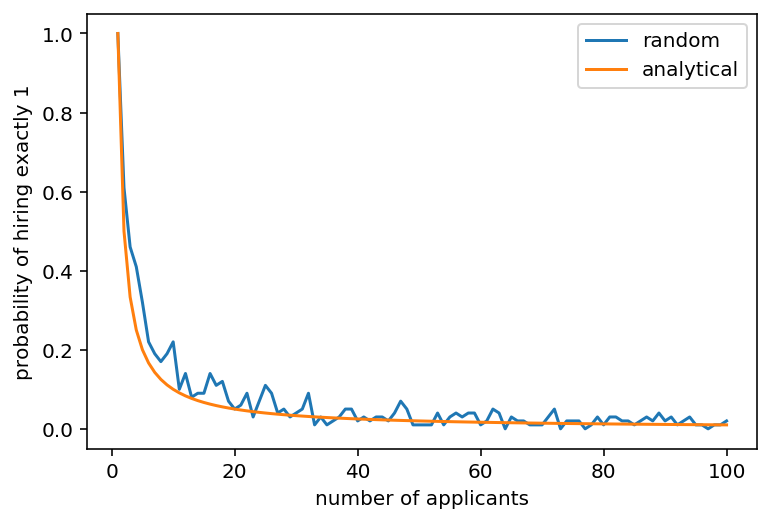

In [69]:
# YOUR CODE HERE
x2=[] #the x axis
random_hired2 = [] #a list to store the probability of experimental_hires
analytical_hired2=[] #just a list, since the function will return a fixed number with each value of N anyway - no need for averages
for N in range(1,101):
    x2.append(N) #populate the x axis 
    counter = 0 #initiate a counter. I will count the number of times the experimental function result in exactly 1, then divide by total number of runs (100)
    for j in range(100):  #reiterate 100 times
        if experimental_hires(N)==1:
            counter += 1
    random_hired2.append(counter/100) #divide by total number of runs
    analytical_hired2.append(1/N) #we don't have to run the analytical function - we know that it will return 1/N anyway, so we append the results
plt.plot(x2,random_hired2)
plt.plot(x2, analytical_hired2)
plt.xlabel('number of applicants')
plt.ylabel('probability of hiring exactly 1')
plt.legend(['random','analytical'])

## [Optional] Question 5.
Assume that an assistant is able to perform an amount of work each day that is equal to their “quality”. You have a total amount of work M that needs to be accomplished. Your costs are as follows:
* X = daily salary for the assistant,
* Y = fee to the employment agency,
* Z = retrenchment fee for the old assistant.

Try to formulate an optimal stopping rule (i.e., at what point should one stop requesting new potential hires from the agency?) Make any necessary assumptions to ensure the problem is well-formulated.


In [0]:
# YOUR CODE HERE
raise NotImplementedError()

## Part B. The Hat Check Problem.

There is a coat check at a party, where an attendant stores everyone’s hat while they attend the party. The attendant receives the N hats from everyone attending (all attendees come with a hat). Unfortunately, the coat check attendant forgets which hat belongs to whom. Rather than admitting a mistake, the attendant simply returns random hats back to the party-goers. 

What is the average number of correct hats returned? Here are some guiding questions to help you to simulate this problem. 

## Question 1. 
Knowing that everyone’s hats are unique and every guest has a hat. Do you need to generate a random sample in a similar way as what you did for the hiring assistant problem? 

No - we do need a random sample, but not in the exact same way. We will not be comparing if the value of one hat is higher than the other, since every hat is unique, but we do need a "key" assigned to each hat and the same key assigned to its owner, so that we can make a comparison. And since the attendant return random hats back to party-goers (and we will also assume that party-goers leave in random order), we will need to generate a random sample. Therefore the implementation is different, but for both problems we need a random sample.

## Question 2. 
Which of the following commands do you think is the Pythonic way to implement that? 
```
import numpy as np
n = 100 #the number of party attendants `
```
**Command 1. **
```
hat_list = [np.random.integers(0,n) for i in range(n)]`
```
**Command 2.**
```
hat_list = list(range(n)) 
np.random.shuffle(hat_list) 
```
**Command 3.**
```
hat_list = np.random.sample(n)
```

Command 2. This is because in command 1, np.random does not have attribute "integers", while in command 3 we will get a list of random floats from 0 to 1. While it is technically possible for us to assign floats to these hats, since all we need is for them to be unique, command 3 does not guarantee that the floats will not be similar (though it's extremely likely that they won't). Command 2, on the other hand, creates a list of numbers of 0 to 99 inclusively then shuffle them, which guarantees uniqueness.

In [77]:
import numpy as np
#n=100
#hat_list=[np.random.integers(0,n) for i in range(n)]
#hat_list=list(range(n))
#np.random.shuffle(hat_list)
#hat_list
#hat_list=np.random.sample(n)
#hat_list

## Question 3.
Now write a function `hat_check(N)` that has: 
* Input: N the number of party attendants. 
* Output: the number of hats correctly returned despite the fact that hats are randomly handed back to the guests.

You should use the command you picked for question 2. 

In [114]:
def hat_check(N):
    hat_list=list(range(N))
    np.random.shuffle(hat_list) #generate random orders for hats using the command 2 above
    owner_list=list(range(N)) #we also assume that participants will return and take the hats in random order.
    np.random.shuffle(owner_list)
    right_hat_counter=0 #counter to register the number of times a hat is correctly returned
    for i in range(N):
        if hat_list[i] == owner_list[i]: #if the hat is correctly returned
            right_hat_counter+=1
    return right_hat_counter


0

## Question 4.

Plot a curve with the x-axis showing the total number of party attendants and the y-axis showing the average number of hats correctly returned. As always, remember to run several trials. 

Text(0, 0.5, 'average number of hats correctly returned')

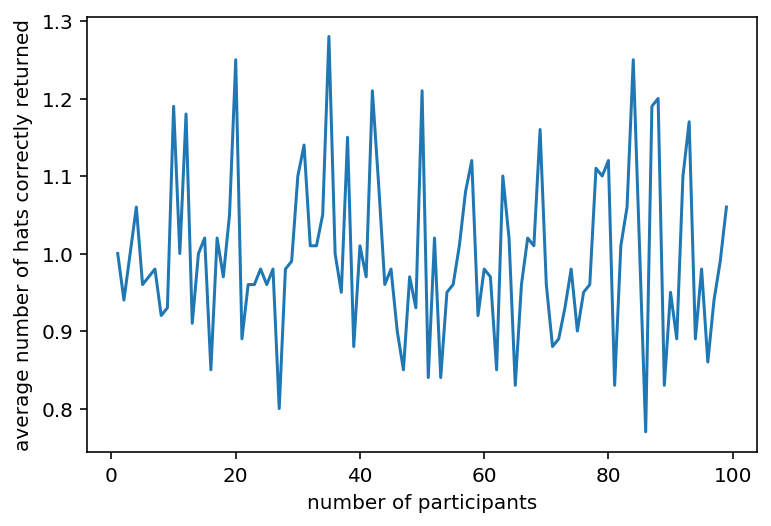

In [135]:
x3=[] #create the x axis
list_right=[] #list to store the average number of hats correctly returned with each n
for n in range(1,100): #N should start from 1 - the party should have at least 1 participant
    x3.append(n)
    list_right_local=[] #list to store the number of hats correctly returned. We later on take the mean of this list
    for i in range(100): #I reiterate 100 times to get the average number of hats correctly returned
        list_right_local.append(hat_check(n)) #store the results from hat_check
    list_right.append(mean(list_right_local)) #take average 
plt.plot(x3,list_right)
plt.xlabel('number of participants')
plt.ylabel('average number of hats correctly returned')

    


## [Optional] Question 5.
As $N$ tends to infinity, the number of correct hats returned tends towards a well-known statistical distribution. State the distribution with all its parameters. Plot several samples using your code. Does the empirical distribution match your theoretical prediction?

YOUR ANSWER HERE